# Week3授業前課題　１　アヤメの分析

【問題1】データの取得
以下のドキュメントを参考にしながら、irisデータセット読み込みましょう。

sklearn.datasets.load_iris — scikit-learn 0.20.2 documentation

データが読み込めたら、説明変数を下のようなPandasのDataFrame型変数Xに格納してください。列の名前も以下を参考にしてください。

In [307]:
import numpy as np
import matplotlib.pyplot as plt

In [339]:
from sklearn.datasets import load_iris
iris = load_iris()
import pandas as pd
X=pd.DataFrame(iris.data, columns=iris.feature_names)
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [340]:
#y ['Species']= [iris.target_names[i] for i in iris.target]
y= pd.DataFrame(iris.target)
y

,0
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


【問題2】データの結合
問題1で準備したX,yを結合させたDataFrame型変数dfを作成してください。結合することで扱いやすくなります。これ以降はこのdfを使っていきます。

In [341]:
#frames =([y, X])
#result# = pd.concat(frames,ignore_index=True)

#s1 = pd.Series(['X0', 'X1', 'X2', 'X3'], name='X')

df = pd.concat([X, y], axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),0
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# 【問題3】データの確認
今回扱うデータがどのようなものなのかを確認します。以下の4つを行ってください。

先頭から4番目までのサンプルを表示させ、各特徴量がどういったものかを見る。（数値データか文字データかなど）
ラベルごとのサンプル数の合計を出力する。
特徴量に欠損値があるかを確認する。
特徴量の平均値と標準偏差、四分位数を一度に表示させる。
DataFrameのメソッドである.head(),.info(),.describe(),.isnull(),.sum()や、Seriesのメソッドである.value_countsなどを使ってみましょう。

#先頭から4番目までのサンプルを表示させ、各特徴量がどういったものかを見る。（数値データか文字データかなど）

In [345]:
df.head(5).info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
sepal length (cm)    5 non-null float64
sepal width (cm)     5 non-null float64
petal length (cm)    5 non-null float64
petal width (cm)     5 non-null float64
0                    5 non-null int64
dtypes: float64(4), int64(1)
memory usage: 328.0 bytes


In [348]:
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),0
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [347]:
np.corrcoef([iris.data[:, 0], iris.data[:, 1],iris.data[:, 2], iris.data[:, 3]])

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

#ラベルごとのサンプル数の合計を出力する。

In [312]:
s =df.sum()
s

sepal length (cm)    876.5
sepal width (cm)     458.6
petal length (cm)    563.7
petal width (cm)     179.9
0                    150.0
dtype: float64

#特徴量に欠損値があるかを確認する

In [313]:
df.isna()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),0
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


#特徴量の平均値と標準偏差、四分位数を一度に表示させる。

In [315]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),0
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# 【問題4】irisデータセット自体の調査

ページのはじめで「カナダのガスペ半島のある牧草地で」と書きましたが、データセット自体についてもう少し調査しておきましょう。データセットを見る上で、そのデータセット自体について知っておくことも大切です

#  【問題5】必要なデータを抽出
DataFrameから必要なデータを抽出する方法を確認していきます。以下を行ってください。

sepal_widthの列を３つの異なる方法で抽出する
50番目から99番目までのデータを抽出する
petal_lengthの列の50番目から99番目までのデータを抽出する
petal_widthの値が0.2のデータを抽出する
.locや.ilocを使うことになります。この２つはどう違うのかについて説明してください。

In [316]:
df.loc[:,"sepal width (cm)"] #列データを抜き出す

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal width (cm), Length: 150, dtype: float64

In [317]:
df.iloc[:,1] #列データを抜き出す

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal width (cm), Length: 150, dtype: float64

In [318]:
df["sepal width (cm)"] #列データを抜き出す

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal width (cm), Length: 150, dtype: float64

In [351]:
#50番目から99番目までのデータを抽出する
df.iloc[50:100,:]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),0
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
55,5.7,2.8,4.5,1.3,1
56,6.3,3.3,4.7,1.6,1
57,4.9,2.4,3.3,1.0,1
58,6.6,2.9,4.6,1.3,1
59,5.2,2.7,3.9,1.4,1


petal_lengthの列の50番目から99番目までのデータを抽出する

In [321]:
df.loc[50:100,'petal length (cm)']

49     1.4
50     4.7
51     4.5
52     4.9
53     4.0
54     4.6
55     4.5
56     4.7
57     3.3
58     4.6
59     3.9
60     3.5
61     4.2
62     4.0
63     4.7
64     3.6
65     4.4
66     4.5
67     4.1
68     4.5
69     3.9
70     4.8
71     4.0
72     4.9
73     4.7
74     4.3
75     4.4
76     4.8
77     5.0
78     4.5
79     3.5
80     3.8
81     3.7
82     3.9
83     5.1
84     4.5
85     4.5
86     4.7
87     4.4
88     4.1
89     4.0
90     4.4
91     4.6
92     4.0
93     3.3
94     4.2
95     4.2
96     4.2
97     4.3
98     3.0
99     4.1
100    6.0
Name: petal length (cm), dtype: float64

petal_widthの値が0.2のデータを抽出する

In [322]:
df[df['petal width (cm)'] == 0.2]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),0
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
10,5.4,3.7,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
14,5.8,4.0,1.2,0.2,0


# 【問題6】図の作成
データは可視化して確認することが大切です。次の3つを行ってください。作図のライブラリはMatplotlibの他seabornもよく使われます。

ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）

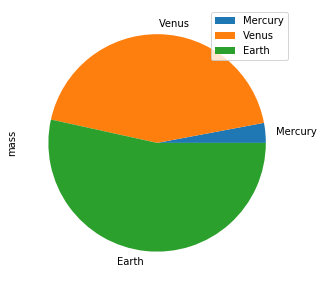

In [323]:
df = pd.DataFrame({'mass': [0.330, 4.87, 5.97]},
                  index=['Mercury', 'Venus', 'Earth'])

plot = df.plot.pie(y='mass', figsize=(5, 5))      

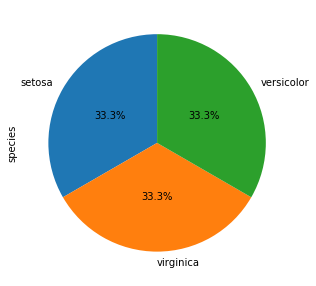

In [324]:
import seaborn as sns

iris = sns.load_dataset('iris')
iris['species'].value_counts().plot.pie(figsize=(5,5),startangle=90,autopct='%1.1f%%',pctdistance=0.5)

特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する  

In [ ]:
#間違ってる

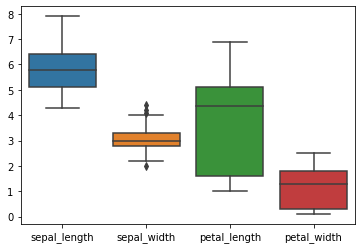

In [325]:
sns.boxplot(data=iris)

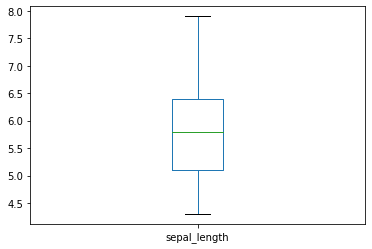

In [326]:
iris.sepal_length.plot.box()

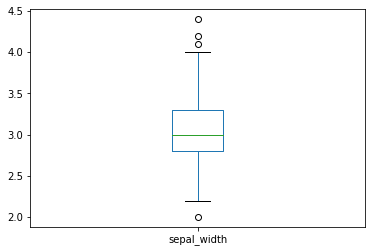

In [327]:
iris.sepal_width.plot.box()

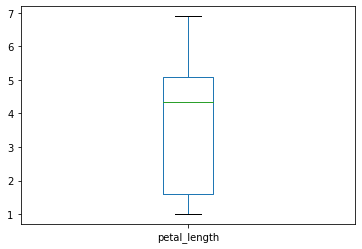

In [328]:
iris.petal_length.plot.box()

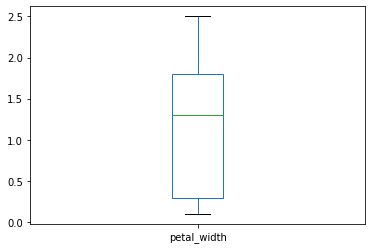

In [329]:
iris.petal_width.plot.box()

特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する

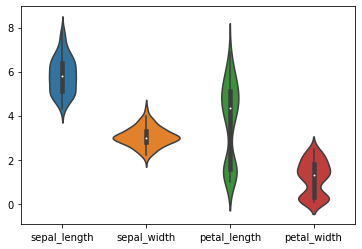

In [330]:
sns.violinplot(data=iris)

箱ひげ図とバイオリン図は似た図を表示します。これらはどう違い、それぞれどのような利点があるのかについて説明してください。

箱ひげ図は、4区間のなかに、それぞれ同じ個数だけデータが入っている。しかし、同じ個数でもその区間の長さが異なることから、データのばらつき具合を知ることが直感的にわかる。
バイオリン図は分布の形状が箱ひげ図よりもさらに直観的にわかるようになる

# 【問題7】特徴量間の関係の確認
特徴量間の関係を見ていきます。次の4つを行ってください。

縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る
全ての組み合わせの散布図を一度に表示させる、散布図行列を作る
４つの特徴量に関する相関係数行列を作る
相関係数行列のヒートマップを作る

縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る

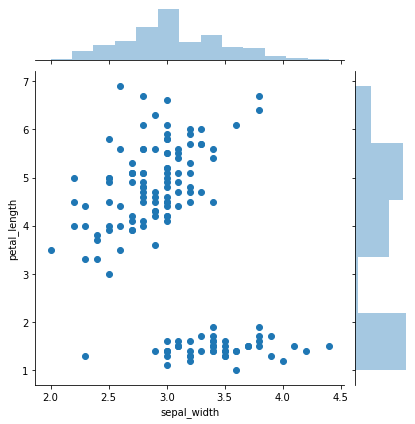

In [331]:
sns.jointplot('sepal_width', 'petal_length', data=iris) #種類毎に色分けした???

全ての組み合わせの散布図を一度に表示させる、散布図行列を作る

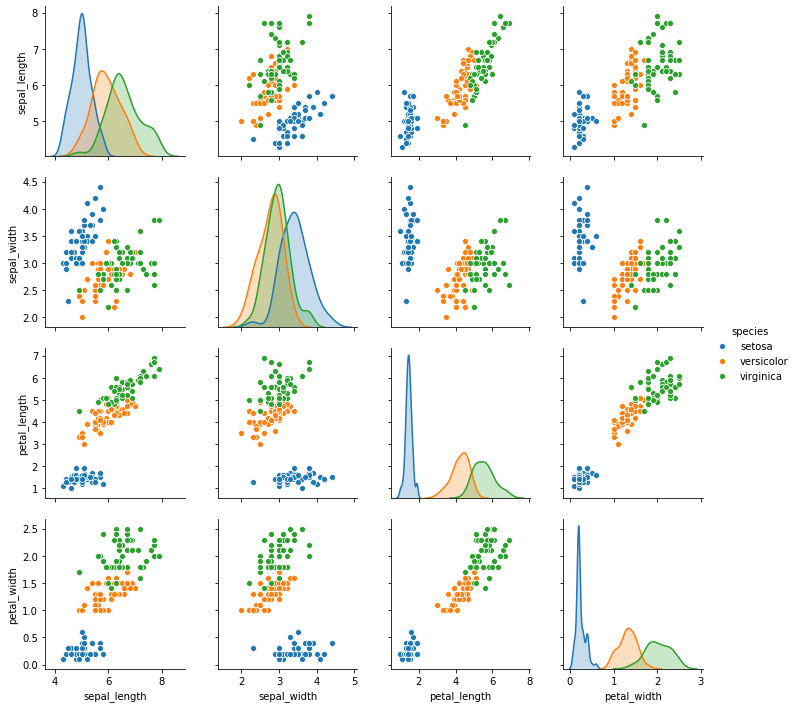

In [332]:
iris = sns.load_dataset("iris")
sns.pairplot(iris, hue='species')

４つの特徴量に関する相関係数行列を作る


機械学習において余計なパラメータは計算リソースが増える・過学習の可能性が増えるので、減らしたいものです。

相関が強い二つパラメータは、片方のパラメータで説明できてしまうので、必要が薄いのです。

相関係数行列を表示すると、パラメータ毎の相関が一発でわかるので、パラメータ選定の助けになります。

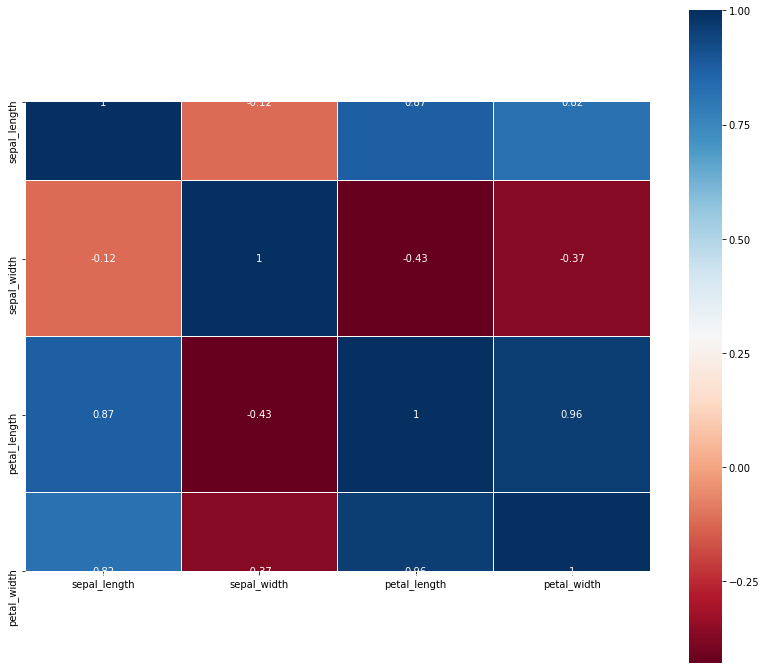

In [289]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
#plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(iris.corr(), linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True) #図が切れる？

# 【問題8】可視化したグラフや表の結果の説明

箱ひげ図やバイオリンプロットから、目的変数の０（以下、Setosa）に関しては、花弁の大きさが長さ幅の両面において他の２種類の目的変数より小さい。

散布図行列から、Setosaは相関において概ね独自のグループを形成している。

目的変数１（viersicolor）と目的変数２（verginica）は多くの組み合わせで散布図が重なっているが、花弁の幅にに関して差異が比較的大きい。

相関係数行列から、花弁の長さと幅が最も相関の高い組み合わせであり、萼片の幅と花弁の長さが最も相関の低い組み合わせである。